<a href="https://colab.research.google.com/github/AllamElsheikh/Projects/blob/main/9_Gold_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importint libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
df = pd.read_csv('goldstock.csv')
df.head()

,Unnamed: 0,Date,Close,Volume,Open,High,Low
0,0,2024-01-19,2029.3,166078.0,2027.4,2041.9,2022.2
1,1,2024-01-18,2021.6,167013.0,2009.1,2025.6,2007.7
2,2,2024-01-17,2006.5,245194.0,2031.7,2036.1,2004.6
3,3,2024-01-16,2030.2,277995.0,2053.4,2062.8,2027.6
4,4,2024-01-12,2051.6,250946.0,2033.2,2067.3,2033.1


some check on the data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2511 entries, 0 to 2510
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2511 non-null   int64  
 1   Date        2511 non-null   object 
 2   Close       2511 non-null   float64
 3   Volume      2511 non-null   float64
 4   Open        2511 non-null   float64
 5   High        2511 non-null   float64
 6   Low         2511 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 137.4+ KB


In [ ]:
df.shape

(2511, 7)

In [ ]:
df.describe().T



,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,2511.0,1260.792911,729.262879,0.0,630.50,1259.0,1888.50,2532.0
Close,2511.0,1498.726085,298.824811,1049.6,1249.85,1332.8,1805.85,2093.1
Volume,2511.0,185970.770609,97600.769382,1.0,126693.50,175421.0,234832.00,787217.0
Open,2511.0,1498.725528,299.118187,1051.5,1249.50,1334.0,1805.60,2094.4
High,2511.0,1508.451454,301.262244,1062.7,1257.30,1342.4,1815.45,2098.2
Low,2511.0,1488.869932,296.417703,1045.4,1242.35,1326.6,1793.05,2074.6


In [ ]:
df.isnull(  ).sum()

Unnamed: 0    0
Date          0
Close         0
Volume        0
Open          0
High          0
Low           0
dtype: int64

visualization

<Axes: xlabel='High', ylabel='Count'>

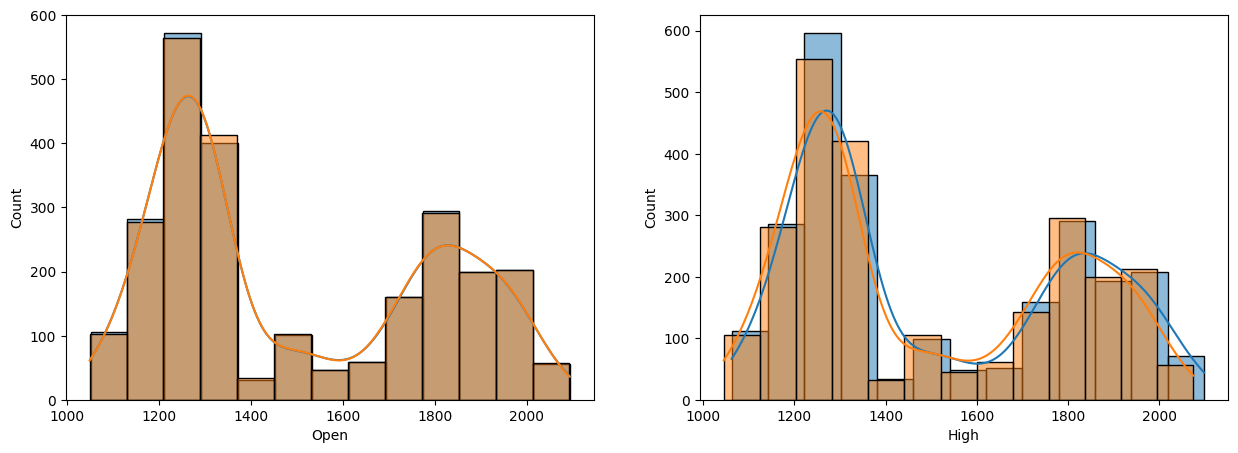

In [ ]:
figure , axis = plt.subplots(1,2 , figsize=(15,5))

sns.histplot(df['Open'],kde=True , ax=axis[0])
sns.histplot(df['Close'],kde=True ,  ax=axis[0])

sns.histplot(df['High'],kde=True , ax=axis[1])
sns.histplot(df['Low'], kde=True , ax=axis[1])

<Axes: >

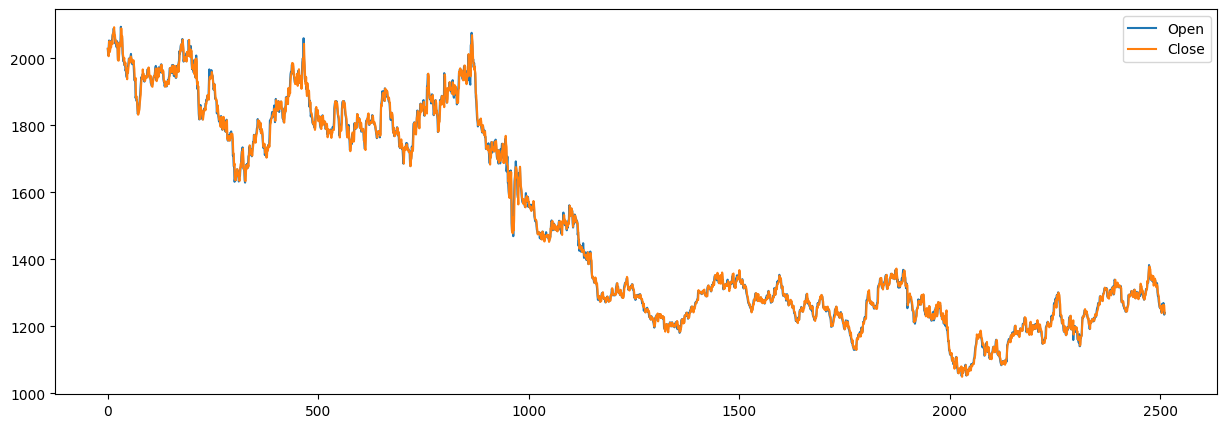

In [ ]:
df[['Open' , 'Close']].plot(figsize=(15,5))

<Axes: >

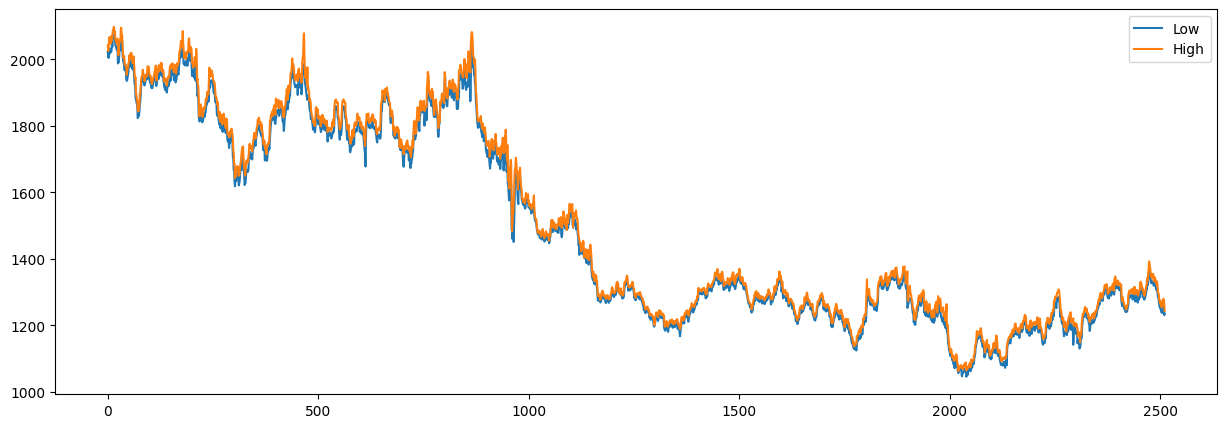

In [ ]:
df[['Low' , 'High']].plot(figsize=(15,5))

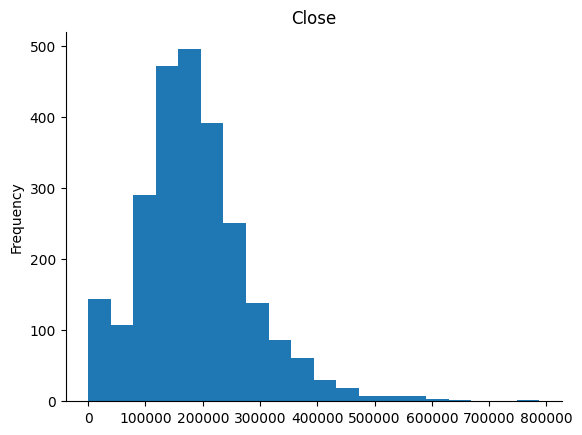

In [ ]:
df['Volume'].plot(kind='hist', bins=20, title='Close')
plt.gca().spines[['top', 'right',]].set_visible(False)

Normalizing and splitting the data

In [ ]:
df= df.drop('Unnamed: 0' , axis = 1 )


In [ ]:
df.head()

,Date,Close,Volume,Open,High,Low
0,2024-01-19,2029.3,166078.0,2027.4,2041.9,2022.2
1,2024-01-18,2021.6,167013.0,2009.1,2025.6,2007.7
2,2024-01-17,2006.5,245194.0,2031.7,2036.1,2004.6
3,2024-01-16,2030.2,277995.0,2053.4,2062.8,2027.6
4,2024-01-12,2051.6,250946.0,2033.2,2067.3,2033.1


In [ ]:
x = df.drop([ 'Date','Volume'] , axis=1)
y =  df['Volume']

x_train ,x_test , y_train , y_test = train_test_split(x,y,test_size=0.2 , random_state=42)

In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
y_train = scaler.fit_transform(y_train.values.reshape(-1,1))
y_test = scaler.transform(y_test.values.reshape(-1,1))

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

xgb_model = xgb.XGBRegressor(tree_method='hist')


param_grid = {"max_depth":    [4, 5, 6],
              "n_estimators": [500, 600, 700],
              "learning_rate": [0.01, 0.015]}

grid = GridSearchCV(xgb_model , param_grid , cv =5 , n_jobs = -1)

grid.fit(x_train , y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.015], 'max_depth': [4, 5, 6],
                         'n_estimators': [500, 600, 700]})

In [ ]:
grid.best_params_

{'learning_rate': 0.015, 'max_depth': 4, 'n_estimators': 600}

In [ ]:
model = xgb.XGBRegressor(learning_rate = grid.best_params_['learning_rate'] ,
                         max_depth = grid.best_params_['max_depth'] ,
                         n_estimators = grid.best_params_['n_estimators'])

model.fit(x_train , y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.015, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=600, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
prid = model.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error
np.square(np.subtract(y_test,prid)).mean()

1.1531471383917788

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

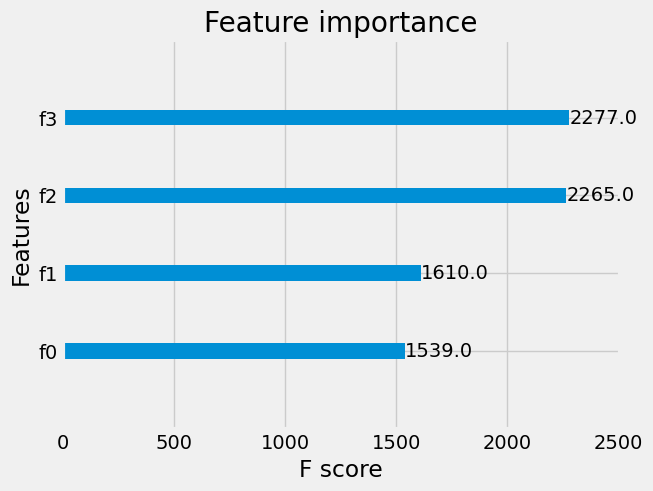

In [ ]:
from xgboost import plot_importance
plt.style.use('fivethirtyeight')
plot_importance(model)